In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Path to your full dataset (replace with the actual filename)
dataset_path = './data/random_test_data/verified_w_candidates_from_3000.json'

# Load the dataset
with open(dataset_path, 'r', encoding="utf-8") as f:
    data = json.load(f)

In [3]:
# compute average of all top scores across all questions
all_top_scores = []
for entry in data:
    # Extract listwise scores and sort descending
    scores = sorted((cand['listwise'] for cand in entry['candidate_answers'].values()), reverse=True)
    if scores:
        all_top_scores.append(scores[0])  # only consider the top score

global_threshold = np.mean(all_top_scores) if all_top_scores else 0.0

# Collect how many top answers pass the threshold per question
records = []
for entry in data:
    q_id = entry.get('id', None)
    # Extract listwise scores and sort descending
    scores = sorted((cand['listwise'] for cand in entry['candidate_answers'].values()), reverse=True)
    if not scores:
        continue
    # Only consider questions whose top score exceeds the threshold
    if scores[0] > global_threshold:
        # Count how many of the top N scores also exceed the threshold
        num_passing = sum(score > global_threshold for score in scores)
        records.append({'id': q_id, 'num_passing': num_passing})

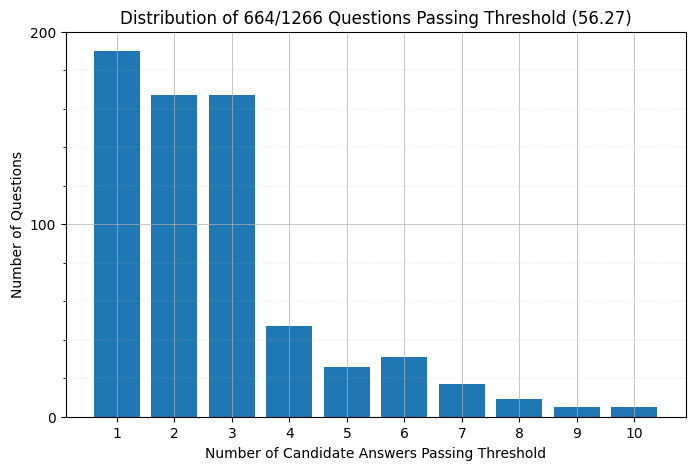

In [5]:
# Build DataFrame
df = pd.DataFrame(records)

# Aggregate: count how many questions have each num_passing value
distribution = df['num_passing'].value_counts().sort_index()
values = distribution.values
indices = distribution.index
max_count = values.max()
step = max(100, max_count // 10)

plt.figure(figsize=(8, 5))
plt.bar(indices, values)

# Major and minor ticks
y_major = np.arange(0, max_count + step, step)
plt.yticks(y_major)

ax = plt.gca()
ax.yaxis.set_minor_locator(plt.MultipleLocator(step // 5))

# Grids
ax.grid(which='major', linestyle='-', linewidth=0.5)
ax.grid(which='minor', linestyle=':', linewidth=0.3)

plt.xlabel('Number of Candidate Answers Passing Threshold')
plt.ylabel('Number of Questions')
plt.title(f'Distribution of {len(df)}/{len(data)} Questions Passing Threshold ({global_threshold:.2f})')
plt.xticks(distribution.index)
plt.show()